In [459]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import math

In [460]:
x = sp.Symbol("x")

x_arr = np.linspace(0, 2 * math.pi, 10000)

def calculate_riemann_integral(f, x0, x1, numpoints = 1000):
    integral_approx = 0
    # distance between two points (will be very small)
    delta = (x1 - x0) / numpoints
    i = 0
    while x0 < x1:
        # put integral_approx calculation inside try-except
        # in case we get "division by zero" exception.
        if(i % (numpoints / 10) == 0):
            # this condition is meant to represent a "loading bar"
            # it will print the current percentage of points processed
            # print(round(x0 / x1, 3) * 100, "%  done")
            pass
        try:
            # Riemann sum
            integral_approx += abs(f(x0) * delta)
        except Exception as e:
            # this might, on very rare occassions, be
            # "division by zero"
            print(e)
        finally:
            x0 += delta
            i += 1
    return integral_approx


def get_kappa(f):
    fder = f.diff(x)
    fderder = fder.diff(x)

    # kappa for polar coordinates
    kappa = sp.sqrt((fderder)**2) / ((1 + (fder)**2)**(3 / 2)) + 1
    
    y = calculate_y(kappa)
    return kappa

    
def get_idx_of_difficulty(function):
    kappa = get_kappa(function)
    # because of the complex calculation revolving the curvature
    # (kappa), we instead calculate its approximation
    # by summing up y values for each x0 in such a way that
    # the distance between two x0 points is infinitely small

    # if coordinates are polar, then we sum up phi values from 0 to 2pi
    x0 = 0.00  # begin point
    x1 = 2 * math.pi  # end point
    kappa = sp.lambdify(x, kappa, "numpy")

    integral_approx = calculate_riemann_integral(kappa, x0, x1, 1000)
    return integral_approx


def calculate_y(function):
    y = np.zeros(len(x_arr))
    # get the function for plotting
    f = sp.lambdify(x, function, "numpy")

    for i in range(0, len(x_arr)):
        # calculate y for each given y
        y[i] = f(x_arr[i])

    return y


def plot_function(f):
    y = calculate_y(f)
    
    idx_of_difficulty = get_idx_of_difficulty(f)
    print("Index of difficulty:", idx_of_difficulty)
    
    fig = plt.figure()
    # init cartesian graph
    x_range = {
        # start point and end point on which f(x) is defined
        "start": 0,
        "end": 2 * math.pi,
    }
    graph = fig.add_subplot(111)
    # limiting the x axis range
    # but only if coordinates are Cartesian
    graph.set_xlim([
        x_range["start"] - (x_range["end"] - x_range["start"]) / 6,
        x_range["end"] + (x_range["end"] - x_range["start"]) / 6
    ])
    # limiting the y axis range
    graph.set_ylim([0, 2.5])
    graph.plot(x_arr, y) 

    plt.show()
    
def make_sine_gaussian(a, b, c, d, f):
    return a * sp.exp(-(x + b)**2/c) * sp.sin(d * (x + f))

def make_sinc(a, b, c):
    return a*sp.sin(b*(x-c)) / (b*(x-c))

def make_fourier(a, b, c, d = 1):
    return (sp.sin(x /a) + sp.sin(x / b) + sp.cos(x / c)) * d + 1.25  

# Difficulty: Easy

## Test 1

Index of difficulty: 6.289468492486653


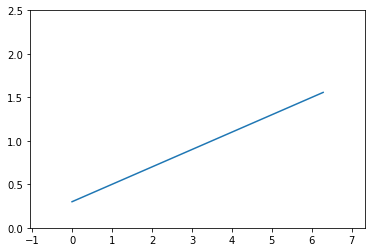

Index of difficulty: 7.692318744783736


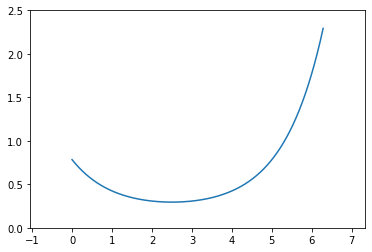

In [461]:
plot_function(0.2 * (x + 1.5))
plot_function((sp.exp(-x + 5) + sp.exp(x)) / 2**8 + 0.2)

## Test 2

Index of difficulty: 7.131728326023963


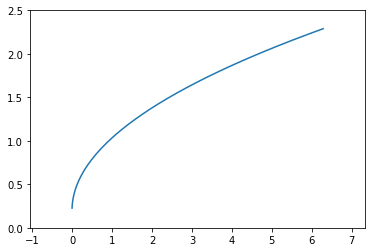

Index of difficulty: 6.289468492486653


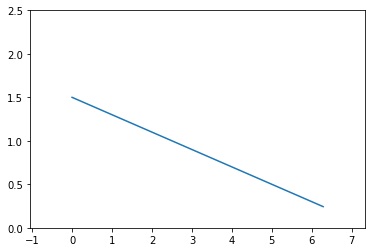

In [462]:
plot_function(sp.sqrt(x + 0.001) / 1.2 + 0.2)
plot_function(-0.2 * (x) + 1.5)

# Difficulty: Medium

## Test 1

Index of difficulty: 15.112957727737864


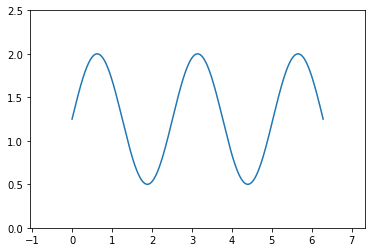

Index of difficulty: 19.354618969173277


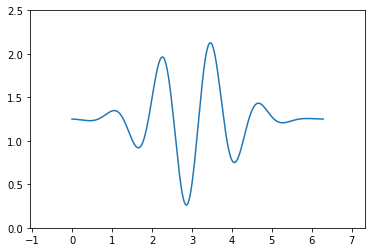

In [463]:
plot_function(sp.sin(2.5*x) * 0.75 + 1.25)
plot_function(make_sine_gaussian(-1, -3, 1.7, 5, 5) + 1.25)

## Test 2

Index of difficulty: 16.553080110151644


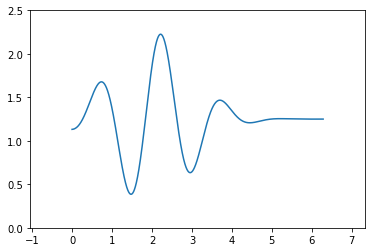

Index of difficulty: 18.29539075890722


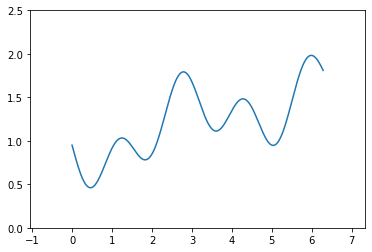

In [481]:
plot_function(make_sine_gaussian(1, -2, 2, 4, 50) + 1.25)
plot_function(make_fourier(0.25, 0.6, 2, -0.3))

# Difficulty: Hard

## Test 1

Index of difficulty: 29.98398037740634


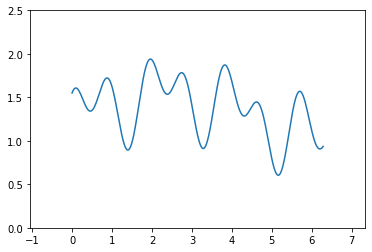

Index of difficulty: 25.411310253027445


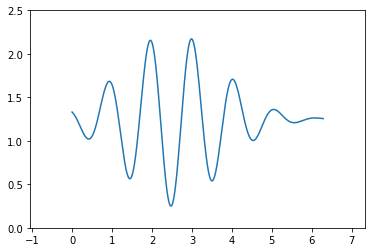

In [465]:
plot_function(make_fourier(0.29, 1.5, 0.15, 0.3))
plot_function(make_sine_gaussian(1, -2.5, 3, 6, 2.5) + 1.25)

## Test 2

Index of difficulty: 28.158520095861643


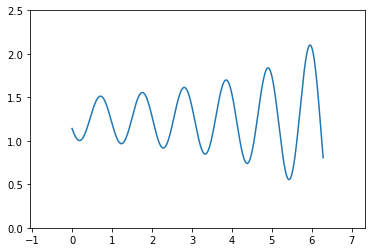

Index of difficulty: 27.57400475182101


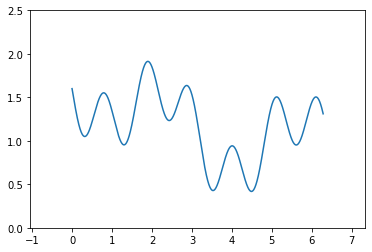

In [466]:
plot_function(make_sinc(12, 6, 8.3) + 1.25)
plot_function(make_fourier(-0.17, -0.5, -1.5, 0.35))